### **SALES DATA ANALYSIS** ###

In [141]:
#importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import combinations  # For finding product combinations
from collections import Counter     # For counting occurrences

In [102]:
#Merging Monthly Sales Data- The following code merges all the CSV files from the Sales_Data folder into a single DataFrame for analysis:

# Define the path to the folder containing the CSV files
folder_path = 'Sales_Data'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
df_list = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all the DataFrames into a single DataFrame
data = pd.concat(df_list, ignore_index=True)

# Write the merged DataFrame to a new CSV file
data.to_csv('merged_output.csv', index=False)



### Data Cleaning ###

In [103]:
data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [104]:
data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Check and Remove NULL values

In [106]:
# Check for null values
data.isnull()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [107]:
#Checking the rows with null values

rows_with_nulls = data[data.isnull().any(axis=1)]
rows_with_nulls

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
#Removing null values

data.dropna(inplace=True)

In [109]:
#Checking date field - Check the 'Order Date' field to ensure proper format

data['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [110]:
# Create a new 'New Order Date' column to store the Order Date
data['New Order Date'] = data['Order Date']
data['New Order Date']


0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: New Order Date, Length: 186305, dtype: object

In [111]:
#Converting datatype into datetime

data['New Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')
data['New Order Date']

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: New Order Date, Length: 186305, dtype: datetime64[ns]






### **Business Questions and Analysis**

Now that the data is cleaned and ready for analysis, let's explore some key business questions that will help us understand trends, identify patterns, and derive actionable insights from the sales data.

---

#### **Question 1: What was the best month for sales?**

To answer this, the total sales per month were analyzed to identify which month had the highest sales. By grouping the data by 'Month' and summing the 'Total Sales', the peak sales month was clearly identified. The results can guide business strategies for marketing, promotions, and inventory planning.


In [112]:
# Converting 'Quantity Ordered' and 'Price Each' Columns into Numeric Type


data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'],errors='coerce').astype('Int64')
data['Price Each']=pd.to_numeric(data['Price Each'],errors='coerce').astype('float')




In [113]:
# Multiply 'Quantity Ordered' by 'Price Each' to get 'Total sales' for each row
# The result is stored in a new column 'Total sales'

data['Total sales']= data['Quantity Ordered'] * data['Price Each']

In [114]:

# Extract the month name from 'New Order Date' and store it in the 'Month' column

data['Month'] = data['New Order Date'].dt.strftime("%B")

# Define the correct chronological order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column to a categorical type with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Group by 'Month' and calculate total sales
monthlysales = data.groupby('Month',observed=False)['Total sales'].sum()

# Display the grouped data in order
print(monthlysales)

Month
January      1822256.73
February     2202022.42
March        2807100.38
April        3390670.24
May          3152606.75
June         2577802.26
July         2647775.76
August       2244467.88
September    2097560.13
October      3736726.88
November      3199603.2
December     4613443.34
Name: Total sales, dtype: Float64


In [115]:
# Find the maximum total sales value
print(max(monthlysales))

# Find the month corresponding to the maximum sales value
print(monthlysales.idxmax())

4613443.34
December


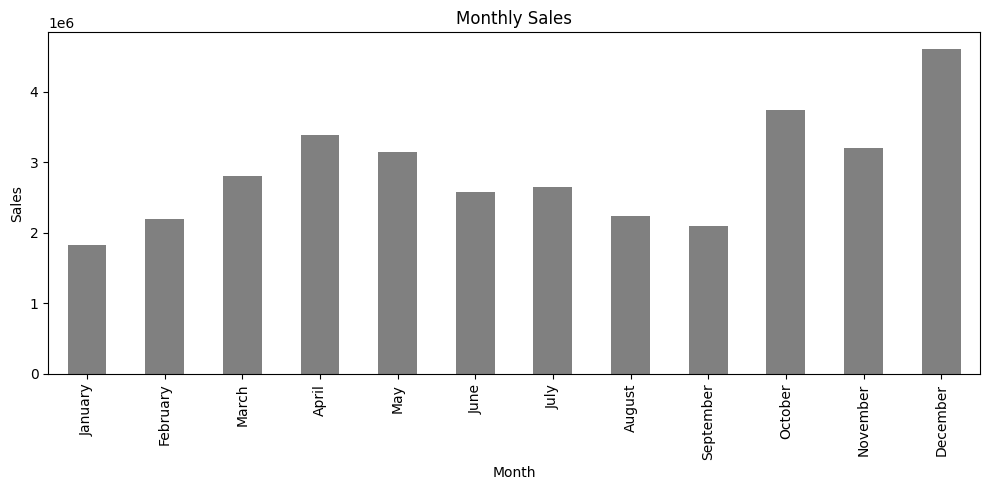

In [116]:
# Plotting the bar chart to visualize the total sales per month

plt.figure(figsize=(10,5))
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
monthlysales.plot(kind="bar",color='grey')
plt.tight_layout()



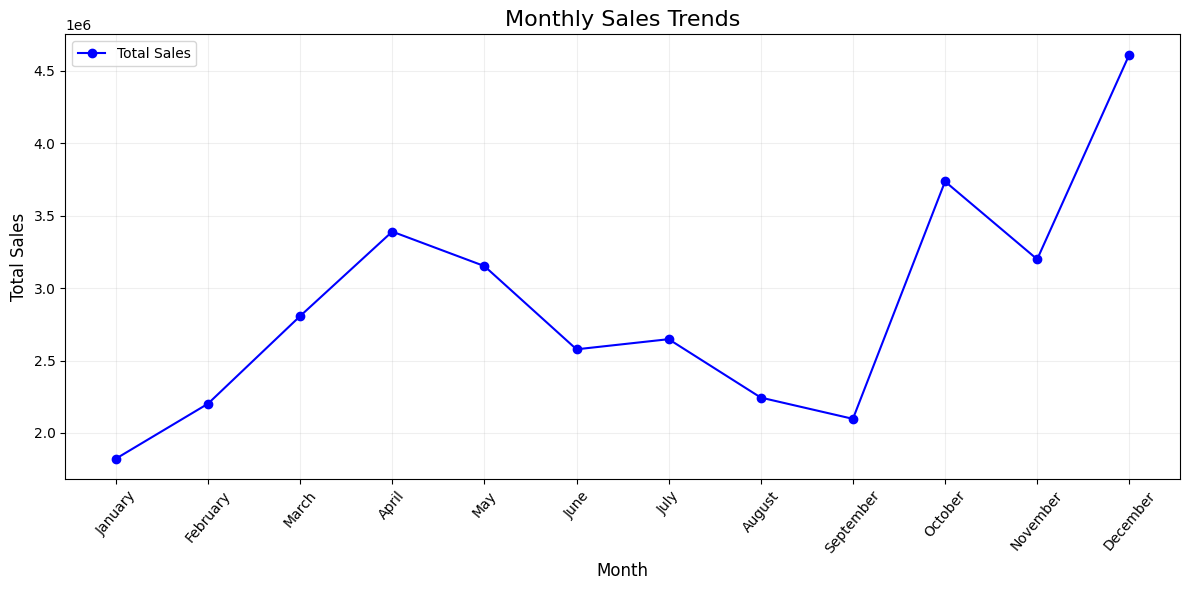

In [117]:
# Plotting the line graph to visualize the sales trends over the months
# This graph will help identify any patterns or fluctuations in sales throughout the year.


# Ensure data is grouped and sorted correctly by month
monthlysales = data.groupby('Month',observed=False)['Total sales'].sum().reset_index() #converted into dataframe
monthlysales = monthlysales.sort_values(by='Month')

# Plot the monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthlysales['Month'], monthlysales['Total sales'], marker='o', color='b', linestyle='-', label='Total Sales')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(alpha=0.2)
plt.xticks(range(0, 12))
plt.xticks(rotation=50)  # Show all 12 months on the x-axis
plt.tight_layout()
plt.legend()
plt.show()


**Insight:**

December shows the highest sales, likely due to holiday shopping. The sales trend follows a seasonal pattern, with a steady increase from January to April, followed by a dip during the summer months (June to September). Sales peak in October, November, and December, reflecting strong holiday demand. The sharp rise in December shows the importance of the holiday shopping season, while the slower summer months present an opportunity for targeted promotions. 

To take advantage of this, businesses should focus on preparing for the holiday season with strategic marketing, promotions, and inventory planning, while also exploring strategies to drive sales during the quieter summer months.


#### Question 2: What city sold the most product?


In [118]:
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,New Order Date,Total sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,23.9,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,99.99,April
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.0,April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99,April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,11.99,April
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",2019-04-29 13:03:00,11.95,April
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",2019-04-02 07:46:00,99.99,April
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",2019-04-12 10:58:00,11.95,April
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",2019-04-24 10:38:00,1700.0,April
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",2019-04-08 14:05:00,11.99,April


In [119]:
# The 'Purchase Address' field contains the city as part of the address. 
data['Purchase Address']

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 186305, dtype: object

In [120]:
# Add a new column 'City' by extracting the city name from the 'Purchase Address' column
# Using regex:
#   - ,\s*: Matches a comma followed by any whitespace.
#   - ([^,]+): Captures all characters up until the next comma (i.e., the city name).
#   - ,: Ensures the city is captured by using the second comma in the address format.

data['City']= data['Purchase Address'].str.extract(r',\s*([^,]+),')
data['City']

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
186845      Los Angeles
186846    San Francisco
186847    San Francisco
186848    San Francisco
186849    San Francisco
Name: City, Length: 186305, dtype: object

In [121]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'New Order Date', 'Total sales', 'Month', 'City'],
      dtype='object')

In [122]:
# Group the data by 'City' and calculate the count of 'Quantity Ordered' for each city
# This will give us the total number of products sold per city.

productbycity= data.groupby('City')['Quantity Ordered'].count()
productbycity

City
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: Quantity Ordered, dtype: Int64

In [123]:
max_quantity_sold = productbycity.max()
city_with_max_quantity= productbycity.idxmax()
print(f"Maximum quantity sold is {max_quantity_sold} by the city {city_with_max_quantity}")

Maximum quantity sold is 44732 by the city San Francisco


<Axes: title={'center': 'Quantity sold by Cities'}, xlabel='City', ylabel='Quantity sold'>

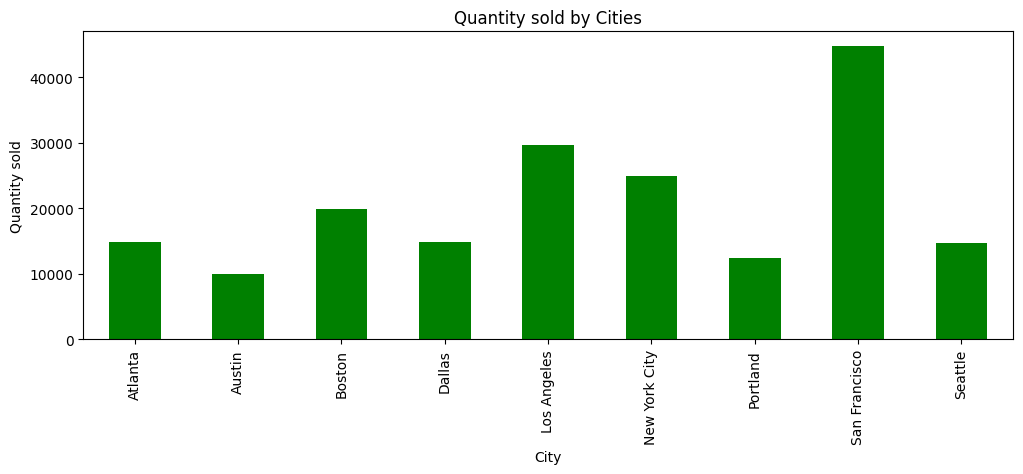

In [124]:
# Plot a bar chart to visualize the quantity of products sold by each city
# The x-axis represents cities, and the y-axis shows the quantity of products sold

plt.figure(figsize=(12,4))
plt.title("Quantity sold by Cities")
plt.xlabel("Cities")
plt.ylabel("Quantity sold")
productbycity.plot(kind='bar',color='green')

**Insight:**

San Francisco has the highest sales, followed by Los Angeles and New York City. These cities are key markets and should be prioritized for marketing and promotions. Cities like Portland, Austin, and Atlanta have lower sales, which could be an opportunity to improve sales through targeted strategies.

 #### Question 3 : What time should we display advertisements to maximize the likelihood of purchases?

In [125]:
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,New Order Date,Total sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,23.9,April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,99.99,April,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.0,April,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99,April,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,11.99,April,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",2019-04-29 13:03:00,11.95,April,San Francisco
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",2019-04-02 07:46:00,99.99,April,Seattle
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",2019-04-12 10:58:00,11.95,April,Atlanta
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",2019-04-24 10:38:00,1700.0,April,San Francisco
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",2019-04-08 14:05:00,11.99,April,Boston


In [126]:
#Extracting Hour from the Order Date:
#The hour of the day is extracted from the "New Order Date" column to analyze the time of day when most purchases occur. 

data['Hours']= data['New Order Date'].dt.hour
data.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,New Order Date,Total sales,Month,City,Hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,23.9,April,Dallas,8.0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,99.99,April,Boston,22.0
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.0,April,Los Angeles,14.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99,April,Los Angeles,14.0
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,11.99,April,Los Angeles,9.0


In [127]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'New Order Date', 'Total sales', 'Month', 'City',
       'Hours'],
      dtype='object')

In [128]:
Order_by_hours = data.groupby('Hours')['Order ID'].count()



<Axes: title={'center': 'Total count of purchase by hours of the day'}, xlabel='Hours', ylabel='Count of purchase'>

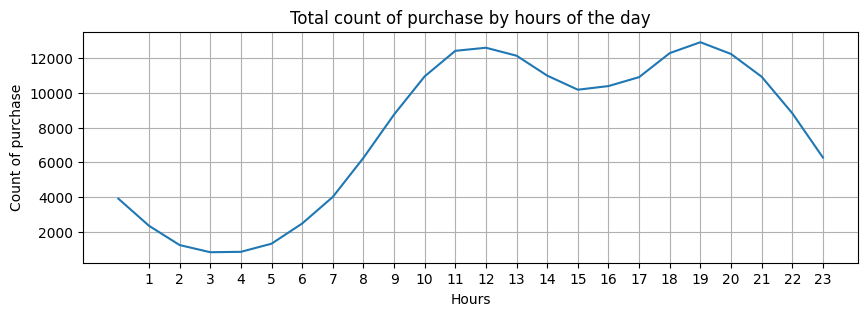

In [129]:
# Visualizing Purchases by Hour of the Day:
#  line plot displays the total number of purchases made at each hour of the day.
# It helps to identify peak purchasing hours, which can inform optimal times for displaying advertisements or targeting customers.



plt.figure(figsize=(10,3))
plt.title("Total count of purchase by hours of the day")
plt.xlabel("Hours")
plt.ylabel("Count of purchase")
plt.xticks(range(1, 24)) 
Order_by_hours.plot(kind='line',grid=True)

**Insight:**

The graph shows that most purchases happen in the evening, between 18:00 and 20:00, with a second peak at 11:00 in the morning. This suggests that people tend to shop during their breaks or after work.

To increase sales, advertisements should be displayed around 11:00 and 18:00 to 20:00, when customer activity is highest.

#### Question 4: What products are most often sold together? 

In [130]:
#Identifying repeating Order Ids

Repeating_orderIds = data[data['Order ID'].duplicated(keep=False)]
Repeating_orderIds

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,New Order Date,Total sales,Month,City,Hours
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.0,April,Los Angeles,14.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99,April,Los Angeles,14.0
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,600.0,April,Los Angeles,19.0
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,11.95,April,Los Angeles,19.0
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",2019-04-07 11:31:00,99.99,April,Boston,11.0
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",2019-09-20 20:18:00,3.84,September,Atlanta,20.0
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",2019-09-16 00:25:00,11.99,September,Atlanta,0.0
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",2019-09-16 00:25:00,5.98,September,Atlanta,0.0
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",2019-09-30 13:49:00,600.0,September,San Francisco,13.0


In [131]:
grouped_products= Repeating_orderIds.groupby('Order ID')['Product'].apply(list)
grouped_products

Order ID
141275               [USB-C Charging Cable, Wired Headphones]
141290      [Apple Airpods Headphones, AA Batteries (4-pack)]
141365                    [Vareebadd Phone, Wired Headphones]
141384                   [Google Phone, USB-C Charging Cable]
141450             [Google Phone, Bose SoundSport Headphones]
                                  ...                        
319556                       [Google Phone, Wired Headphones]
319584                             [iPhone, Wired Headphones]
319596                     [iPhone, Lightning Charging Cable]
319631      [34in Ultrawide Monitor, Lightning Charging Ca...
Order ID    [Product, Product, Product, Product, Product, ...
Name: Product, Length: 7137, dtype: object

In [132]:
#Count combinations of products

product_combinations = Counter()
for products in grouped_products:
    product_combinations.update(combinations(sorted(products), 2)) 


In [133]:
#Display the most common product combinations
most_common_combinations = product_combinations.most_common(6)
for combination, count in most_common_combinations:
    print(f"Products: {combination}, Count: {count}")

Products: ('Product', 'Product'), Count: 62835
Products: ('Lightning Charging Cable', 'iPhone'), Count: 1015
Products: ('Google Phone', 'USB-C Charging Cable'), Count: 999
Products: ('Wired Headphones', 'iPhone'), Count: 462
Products: ('Google Phone', 'Wired Headphones'), Count: 423
Products: ('Apple Airpods Headphones', 'iPhone'), Count: 373


**Insight:**

This insight suggests that customers often purchase complementary items, such as charging cables and headphones, along with their phones. Businesses can leverage this information for strategic product bundling, targeted advertisements, and promotions to increase sales by recommending or packaging these items together.

#### Question 5: What product sold the most? Why do you think it did?**

In [134]:
product_sold=data.groupby('Product')['Quantity Ordered'].sum()
product_sold

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
Product                           0
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: Int64

In [135]:
data = data[data['Product'] != 'Product']

In [136]:
# Print the most sold product and its count

print(f'most sold product is {product_sold.idxmax()} and count is {product_sold.max()}')

most sold product is AAA Batteries (4-pack) and count is 31017


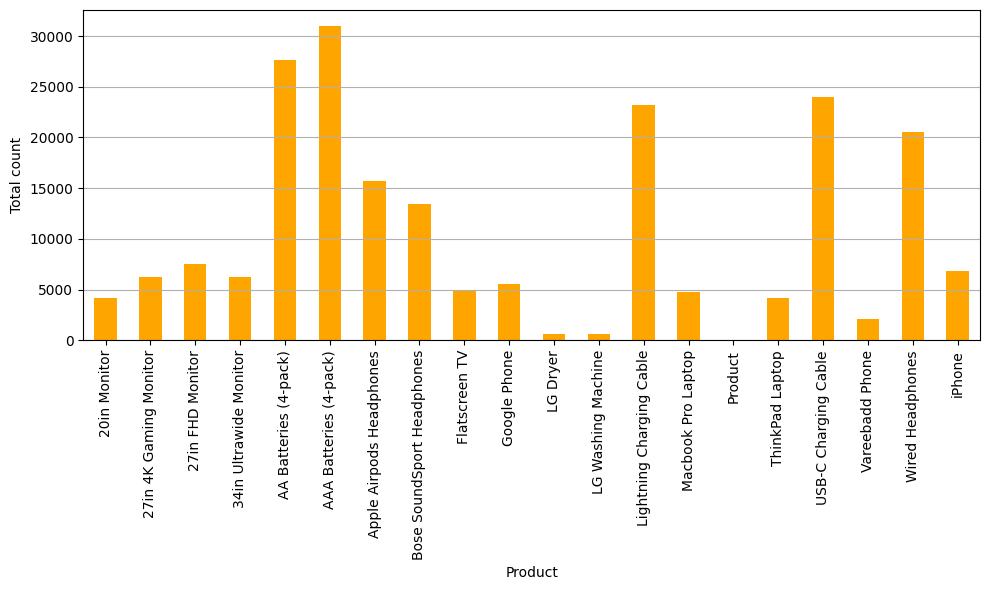

In [137]:
# Visualizing the total quantity sold for each product using a bar chart
# This helps us understand the distribution of product sales and identify the most popular products.

plt.figure(figsize=(10,6))
plt.xlabel('products')
plt.ylabel('Total count')
product_sold.plot(kind='bar',color='orange')
plt.grid(axis='y')
plt.tight_layout()


In [138]:
# Calculating the average price for each product
# This helps us understand the price distribution and how it may correlate with product sales.

product_prices= data.groupby('Product')['Price Each'].mean()

In [139]:
product_prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2708\3081484051.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_sold.index, rotation=45, ha='right')


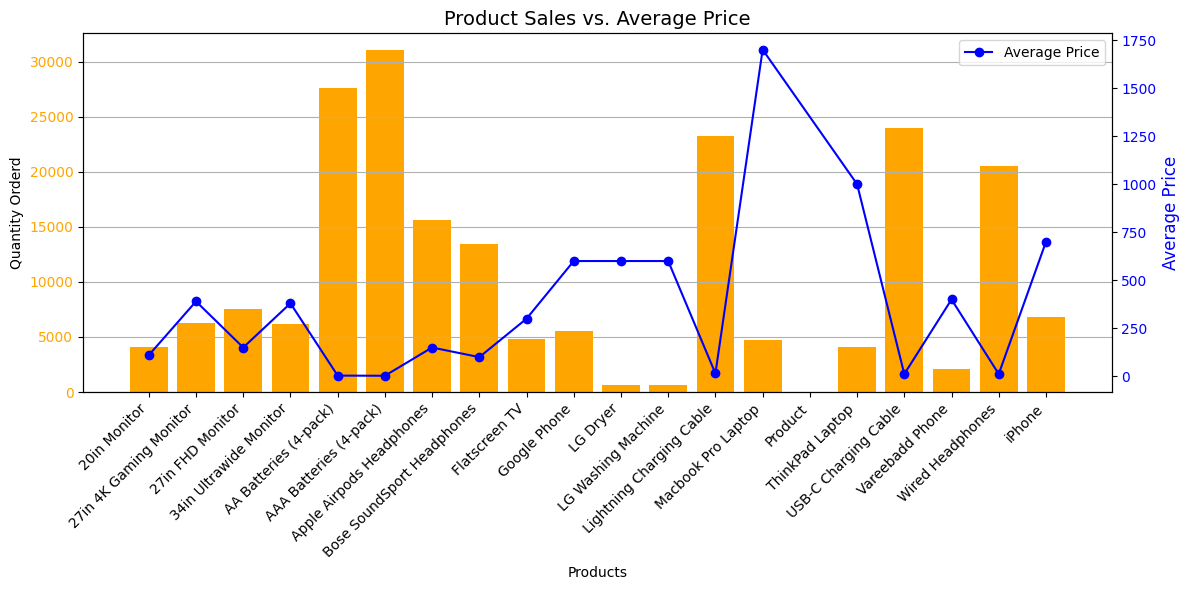

In [140]:
# Visualizing the relationship between the quantity ordered and the average price for each product
# The bar plot represents the total quantity sold for each product, and the line plot shows the average price.
# This comparison helps us understand if there’s a correlation between higher sales and price variations.



# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))


# Quantity Ordered - Bar Plot
ax1.bar(product_sold.index,product_sold.values,color='Orange',label='Quanity Orederd')
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Orderd")
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xticklabels(product_sold.index, rotation=45, ha='right')


#Average price - Line Plot
ax2 = ax1.twinx()
ax2.plot(product_prices.index, product_prices.values, color='blue', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


plt.title('Product Sales vs. Average Price', fontsize=14)
ax1.grid(axis='y')
plt.legend()

plt.tight_layout()




**Insight:**
The products with the highest sales are AAA Batteries (4-pack) and AA Batteries (4-pack), likely due to their affordability and frequent usage. Other popular items, such as Lightning Charging Cable and Wired Headphones, also show high sales due to their lower price points and everyday necessity. In contrast, more expensive items like Macbook Pro Laptop and Google Phone sell fewer units but generate significant revenue because of their higher prices. This reflects a balance between quantity sold and price, with lower-cost items driving volume and higher-cost items contributing to higher revenue per unit.